#### Метод опорных векторов для линейно разделимого случая.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

In [42]:
df = pd.read_csv('datalin.csv')
df['Насекомое'] = np.where(df['Насекомое'] == 'гусеница', -1, 1)

X_train = np.hstack((df['Ширина'].values.reshape(-1, 1), df['Длина'].values.reshape(-1, 1)))
y_train = np.hstack((df['Насекомое'].values))

In [43]:
clf = svm.SVC(kernel='linear') # SVM с линейным ядром
clf.fit(X_train, y_train) 

dual_coef = clf.dual_coef_ # Получаем дуальные переменные (множители Лагранжа)
intercept = clf.intercept_ # Получаем смещение (intercept)
support_vectors = clf.support_vectors_ # Получаем список опорных векторов
w1 = clf.coef_
print(w1)

print("Дуальные переменные (множители Лагранжа):")
print(dual_coef)

print("\nСмещение (intercept):")
print(intercept)

print("\nСписок опорных векторов:")
print(support_vectors)


[[-0.94704999  0.52613888]]
Дуальные переменные (множители Лагранжа):
[[-0.58706023  0.02399932  0.56306091]]

Смещение (intercept):
[0.26318148]

Список опорных векторов:
[[28. 48.]
 [12. 23.]
 [27. 50.]]


In [44]:
lin_clf = svm.LinearSVC(dual=False, max_iter=100000)
lin_clf.fit(X_train, y_train) 

v = clf.support_vectors_ # выделение опорных векторов
w = lin_clf.coef_[0] # коэффициенты линейной модели

print("\nВыделение опорных векторов:")
print(v)

print(lin_clf.intercept_)

print("\nКоэффициенты линейной модели:")
print(w)


Выделение опорных векторов:
[[28. 48.]
 [12. 23.]
 [27. 50.]]
[0.17818388]

Коэффициенты линейной модели:
[-0.78552808  0.43807222]


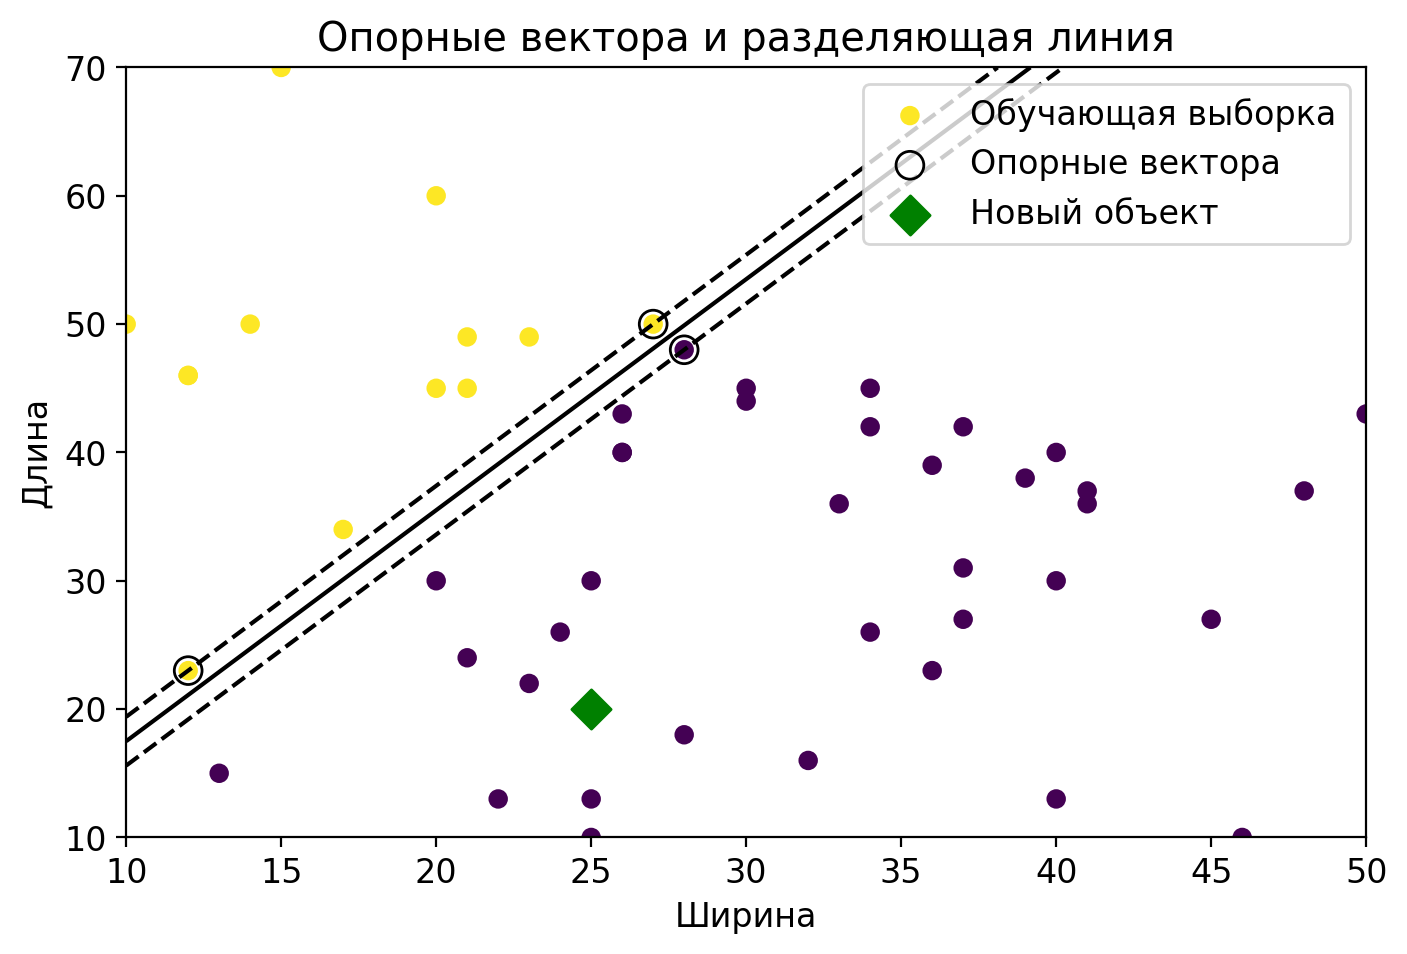

In [45]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Обучающая выборка')
plt.scatter(v[:, 0], v[:, 1], s=100, facecolors='none', edgecolors='k', label='Опорные вектора')

new_object = np.array([[25, 20]]) 
plt.scatter(new_object[:, 0], new_object[:, 1], c='green', marker='D', s=100, label='Новый объект')

# Разделяющая линия (гиперплоскость)
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.xlim(10)
plt.ylim(10)
plt.xlabel('Ширина')
plt.ylabel('Длина')
plt.legend(loc='best')
plt.title('Опорные вектора и разделяющая линия')

plt.show()

Классификация нового объекта с использованием LinearSVC.

In [46]:
predicted_class = lin_clf.predict(new_object)
print(f'Предсказанный класс для нового объекта: {predicted_class[0]}')

Предсказанный класс для нового объекта: -1


#### Метод опорных векторов для линейно НЕразделимого случая.



In [47]:
df = pd.read_csv('datanelin.csv')
df['Насекомое'] = np.where(df['Насекомое'] == 'гусеница', -1, 1)

X_train = np.hstack((df['Ширина'].values.reshape(-1, 1), df['Длина'].values.reshape(-1, 1)))
y_train = np.hstack((df['Насекомое'].values))

In [48]:
clf = svm.SVC(kernel='linear') # SVM с линейным ядром
clf.fit(X_train, y_train) 

dual_coef = clf.dual_coef_ # Получаем дуальные переменные (множители Лагранжа)
intercept = clf.intercept_ # Получаем смещение (intercept) 

# print("Дуальные переменные (множители Лагранжа):")
# print(dual_coef)

# print("\nСмещение (intercept):")
# print(intercept)

y_pred = clf.predict(X_train) # проверка на обучающей выборке

v = clf.support_vectors_ # Получаем список опорных векторов

# print("\nВыделение опорных векторов:")
# print(v)
# print(y_pred)

Предсказание класса нового объекта с использованием clf.predict.

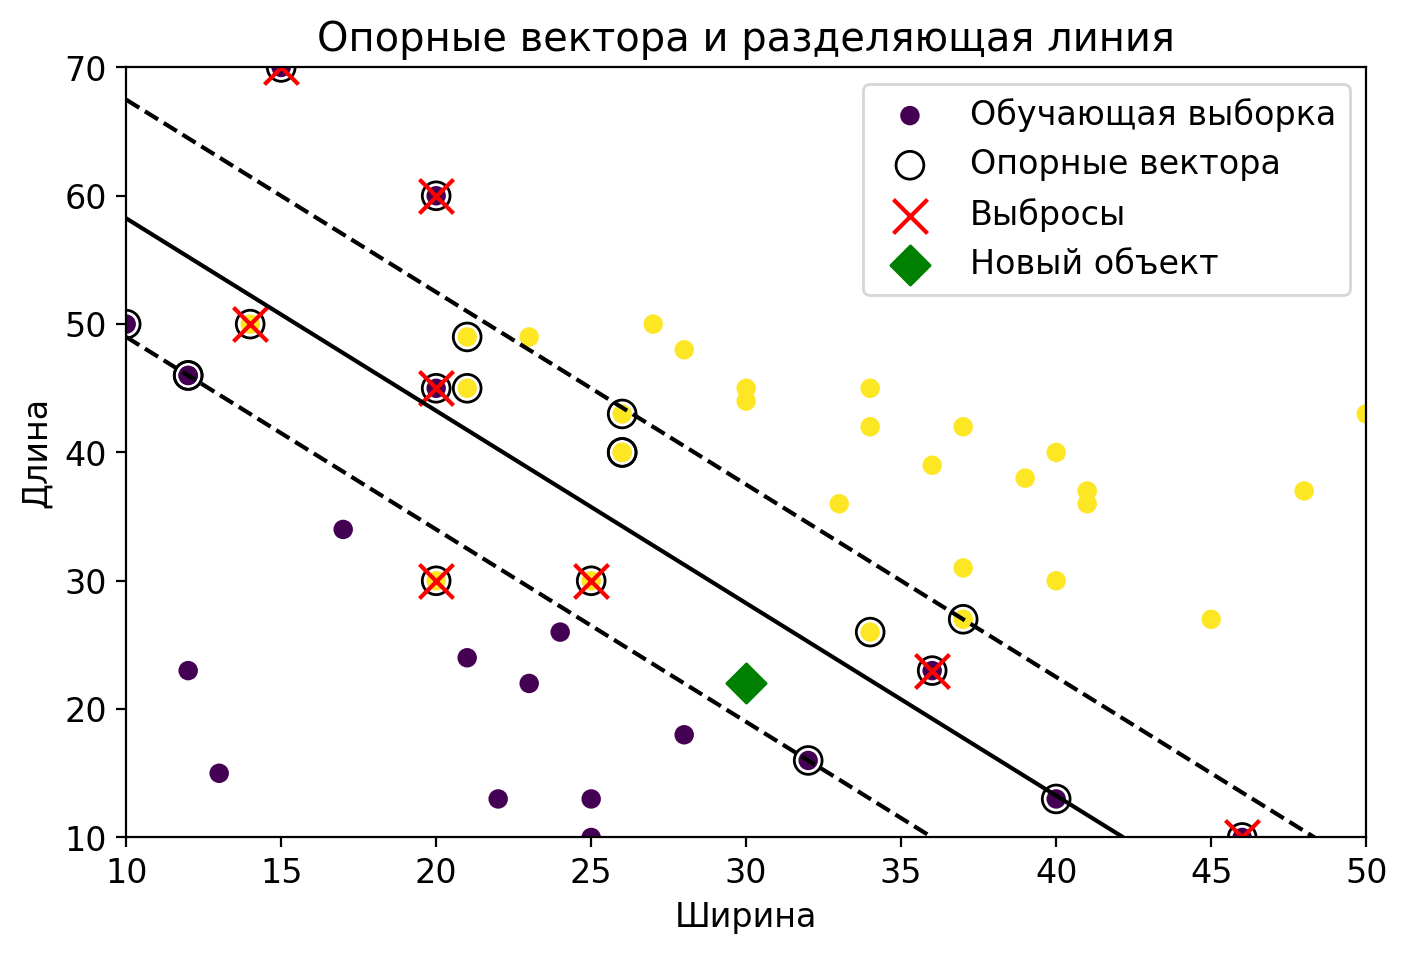

Предсказанный класс нового объекта (с использованием clf.predict): -1


In [49]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Обучающая выборка')
plt.scatter(v[:, 0], v[:, 1], s=100, facecolors='none', edgecolors='k', label='Опорные вектора')

# Определение выбросов (точек с неправильными метками)
outliers = np.where(y_pred != y_train)[0]
plt.scatter(X_train[outliers, 0], X_train[outliers, 1], s=150, marker='x', c='red', label='Выбросы')

new_object = np.array([[30, 22]])
predicted_class = clf.predict(new_object)
plt.scatter(new_object[:, 0], new_object[:, 1], c='green', marker='D', s=100, label='Новый объект')

xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.xlim(10)
plt.ylim(10)
plt.xlabel('Ширина')
plt.ylabel('Длина')
plt.legend(loc='best')
plt.title('Опорные вектора и разделяющая линия')

plt.show()

print(f'Предсказанный класс нового объекта (с использованием clf.predict): {predicted_class[0]}')

#### Определение класса нового объекта через атрибуты dual_coef_ (дуальные переменные) и intercept_ (смещение).

Классификатор вычисляет взвешенную сумму скалярных произведений опорных векторов с входным вектором x,
вычитает смещение b и определяет знак. Если вектор дает большую сумму проекций на опорные вектора класса +1, то объект будет отнесен к этому классу.

In [50]:
k = np.dot(dual_coef, v).ravel()
decision_function = np.dot(k, new_object.T) + intercept

# Определите класс нового объекта
if decision_function > 0:
    new_object_class = 1  # Первый класс
else:
    new_object_class = -1  # Второй класс

# Выведите предсказанный класс нового объекта
print(f'Предсказанный класс нового объекта (без clf.predict): {new_object_class}')

Предсказанный класс нового объекта (без clf.predict): -1
